In [1]:
'''爬取章节'''
import requests
import chardet
import emoji
from bs4 import BeautifulSoup
'''
导入需要的包
request-模拟网络请求
BeautifulSoup-解析网络页面

chardet-获取网络的编码格式
emoji-输出时添加emoji(好玩)
'''

In [8]:
class Novel:
    def __init__(self, book_id):
        self.ua = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'}
        self.book_id = book_id

    '''获取簪中录的所有的章节的url'''
    def get_url_list(self):
        summary_url = 'https://www.fpzw.com/xiaoshuo/' + self.book_id +'/'       
        response = requests.get(summary_url, headers=self.ua, timeout = 2)
        response.encoding = chardet.detect(response.content)['encoding']
        html = BeautifulSoup(response.text)
        chapter_url_list = html.find_all('dd')
        if response.status_code == 200:
            print(emoji.emojize(':heartpulse:', use_aliases=True) + '爬取{}章'.format(len(chapter_url_list)-4))
            return [chapter.find('a').get("href") for chapter in chapter_url_list[4:]]
        else:
            print(emoji.emojize(':smiling_imp:', use_aliases=True) + '链接失败！')
            return ''
    '''获取簪中录的所有的章节的url的内容'''
    def get_novel_chapter(self):
        chapter_list = self.get_url_list()
        counts = 1
        for chapter_url in ['https://www.fpzw.com/xiaoshuo/' + self.book_id + i for i in chapter_list]:
            try:
                response = requests.get(chapter_url, headers=self.ua, timeout = 3)
                response.encoding = chardet.detect(response.content)['encoding']
                html = BeautifulSoup(response.text)
                content = html.find('p', attrs={'class':'Text'}).get_text().replace('2k小说网欢迎您！本站域名:"2k小说"的完整拼音fpzw.com，很好记哦！https://www.fpzw.com 好看的小说','').replace('簪中录最新章节', '').replace('强烈推荐：', '').replace('tongzhi();','').replace('2k小说阅读网','').strip()
                with open('./zan_novel.txt', 'a+', encoding='utf-8') as f:
                    f.writelines(content)
                print(emoji.emojize(':arrow_double_down:', use_aliases=True) + '第{}章'.format(counts))
                counts += 1
            except:
                print('第{}章未获取'.format(counts))
                counts += 1
        return ''

In [9]:
if __name__ == '__main__':
    book_id =  '82/82811/' 
    # 这个是小说网址簪中录后面的一部分 https://www.fpzw.com/xiaoshuo/82/82811/
    # 你也可也换用其他小说目录页网址的book_id

    spyder = Novel(book_id)
    spyder.get_novel_chapter()

💗爬取186章
⏬第1章
⏬第2章
⏬第3章
⏬第4章
⏬第5章
⏬第6章
⏬第7章
⏬第8章
⏬第9章
⏬第10章
⏬第11章
⏬第12章
⏬第13章
⏬第14章
⏬第15章
⏬第16章
⏬第17章
⏬第18章
⏬第19章
⏬第20章
⏬第21章
⏬第22章
⏬第23章
⏬第24章
⏬第25章
⏬第26章
⏬第27章
⏬第28章
⏬第29章
第30章未获取
⏬第31章
⏬第32章
⏬第33章
⏬第34章
⏬第35章
⏬第36章
⏬第37章
⏬第38章
⏬第39章
⏬第40章
⏬第41章
⏬第42章
⏬第43章
⏬第44章
⏬第45章
⏬第46章
⏬第47章
⏬第48章
⏬第49章
⏬第50章
第51章未获取
⏬第52章
⏬第53章
⏬第54章
⏬第55章
⏬第56章
⏬第57章
⏬第58章
⏬第59章
⏬第60章
⏬第61章
⏬第62章
⏬第63章
⏬第64章
⏬第65章
⏬第66章
⏬第67章
⏬第68章
⏬第69章
⏬第70章
⏬第71章
⏬第72章
⏬第73章
⏬第74章
第75章未获取
⏬第76章
⏬第77章
⏬第78章
⏬第79章
⏬第80章
⏬第81章
⏬第82章
⏬第83章
⏬第84章
⏬第85章
⏬第86章
⏬第87章
⏬第88章
⏬第89章
⏬第90章
⏬第91章
⏬第92章
⏬第93章
⏬第94章
⏬第95章
⏬第96章
⏬第97章
⏬第98章
⏬第99章
⏬第100章
⏬第101章
⏬第102章
⏬第103章
⏬第104章
⏬第105章
⏬第106章
⏬第107章
⏬第108章
⏬第109章
⏬第110章
⏬第111章
⏬第112章
⏬第113章
⏬第114章
⏬第115章
第116章未获取
⏬第117章
⏬第118章
⏬第119章
⏬第120章
⏬第121章
⏬第122章
⏬第123章
⏬第124章
⏬第125章
⏬第126章
⏬第127章
⏬第128章
⏬第129章
⏬第130章
⏬第131章
第132章未获取
⏬第133章
⏬第134章
⏬第135章
⏬第136章
⏬第137章
⏬第138章
⏬第139章
⏬第140章
⏬第141章
⏬第142章
⏬第143章
⏬第144章
⏬第145章
⏬第146章
⏬第147章
⏬第148章
⏬第149章
⏬第150章
⏬第151章
⏬第152章
⏬第153章
⏬第154章
⏬第155章
⏬第156

In [1]:
'''绘制词云'''
import numpy as np 
import jieba
import collections
from PIL import Image
import matplotlib.pyplot as plt
import wordcloud

'''
numpy-数据格式，方便对蒙版图片进行格式处理
jieba-中文分词
collections-统计词频
Image-处理蒙版图片
plt-显示图片
wordcloud-绘制词云
'''


'''读取文件'''
jieba.load_userdict("./userdict.txt")
txt = open('./zan_novel.txt', 'r', encoding='utf-8').read()
words = jieba.lcut(txt)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\15959\AppData\Local\Temp\jieba.cache
Loading model cost 0.950 seconds.
Prefix dict has been built successfully.


In [2]:
'''读取停用词'''
stopwords = open('./stop.txt', 'r', encoding='utf-8').read().split('\n')
key_words = []
for key in words:
    #去除停用词，去除单字
    if not(key.strip() in stopwords) and (len(key.strip()) > 1) :
        key_words.append(key)

In [48]:
'''统计关键词'''
key_words_count = dict(collections.Counter(key_words))
print('共统计{}关键词'.format(len(key_words_count)))

共统计26986关键词


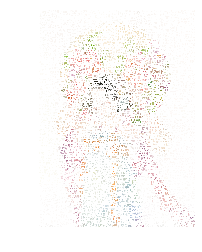

In [9]:
'''绘制词云'''
mask = np.array(Image.open('./4.png'))
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', 
    mask=mask, 
    max_words=20000, 
    max_font_size=20,# 字体最大值
    scale=3, # 精细度
    background_color='#fff',
)
wc.generate_from_frequencies(key_words_count)
image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func=image_colors) # 词云颜色设为背景图方案
plt.imshow(wc)
plt.axis('off')
plt.show() # 
wc.to_file('./cloud1.jpg') # 保存词云图

In [29]:
'''绘制图表'''
import pandas as pd
key_words_data = pd.DataFrame([key_words_count]) 
key_words_data.sort_values(by=0, axis=1, ascending=False, inplace=True)
key_words_data.drop(key_words_data.columns[[i for i in range(100,26986)]], axis=1, inplace=True)
display(key_words_data)

,黄梓瑕,李舒白,周子秦,看着,赶紧,说道,公主,王爷,禹宣,身边,...,蜡烛,公孙鸢,抬手,衣服,孙癞子,慢慢,郡守,转头,门口,判官
0,3512,1714,1410,705,536,524,523,490,487,445,...,153,153,151,150,149,149,144,140,136,134


In [30]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [45]:
key_words_data.iplot(kind='bar',barmode='stack',title='簪中录/青簪行', orientation='h')